# Aula 15 - Exercício Prático

1) Execute os algoritmos k-means e single linkage nos datasets a seguir. Qual o melhor
agrupamento que vc obteve (pode plotar os grupos por cores para facilitar a
identificação). Pode usar bibliotecas ou implementar seu próprio código.

http://cs.joensuu.fi/sipu/datasets/Aggregation.txt

http://cs.joensuu.fi/sipu/datasets/D31.txt

http://cs.joensuu.fi/sipu/datasets/pathbased.txt

http://cs.joensuu.fi/sipu/datasets/flame.txt

### Etapa 01: Setup de Ambiente

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Datasets = {
"Aggregation":"http://cs.joensuu.fi/sipu/datasets/Aggregation.txt",
"D31":"http://cs.joensuu.fi/sipu/datasets/D31.txt",
"Pathbased":"http://cs.joensuu.fi/sipu/datasets/pathbased.txt",
"Flame":"http://cs.joensuu.fi/sipu/datasets/flame.txt"
}

# Definindo número de Clusters (K) para cada Dataset
NClustersMap = {
  "Aggregation":7,
  "D31":31,
  "Pathbased":3,
  "Flame":2
}

for Nome, url in Datasets.items():
  print(f"Processando Dataset: {Nome}")
  K = NClustersMap[Nome]

  DF = pd.read_csv(url, sep='\s+', header=None)

  X = DF.iloc[:, [0, 1]].values
  Scaler = StandardScaler()
  X_Scaled = Scaler.fit_transform(X)

Processando Dataset: Aggregation
Processando Dataset: D31
Processando Dataset: Pathbased
Processando Dataset: Flame


### Aplicação dos Algoritmos

In [ ]:
Kmeans = KMeans(n_clusters = K, random_state=42, n_init="auto")
Kmeans_Labels = Kmeans.fit_predict(X_Scaled)
Kmeans_Silhouette = silhouette_score(X_Scaled, Kmeans_Labels)
print(f"K-Means Silhouette Score: {Kmeans_Silhouette:.4f}")


SingleLinkage = AgglomerativeClustering(n_clusters = K, linkage = "single")
SingleLinkage_Labels = SingleLinkage.fit_predict(X_Scaled)
SingleLinkage_Silhouette = silhouette_score(X_Scaled, SingleLinkage_Labels)
print(f"Single Linkage Silhouette Score: {SingleLinkage_Silhouette:.4f}")

K-Means Silhouette Score: 0.3698
Single Linkage Silhouette Score: 0.2958


### Visualização de Resultados

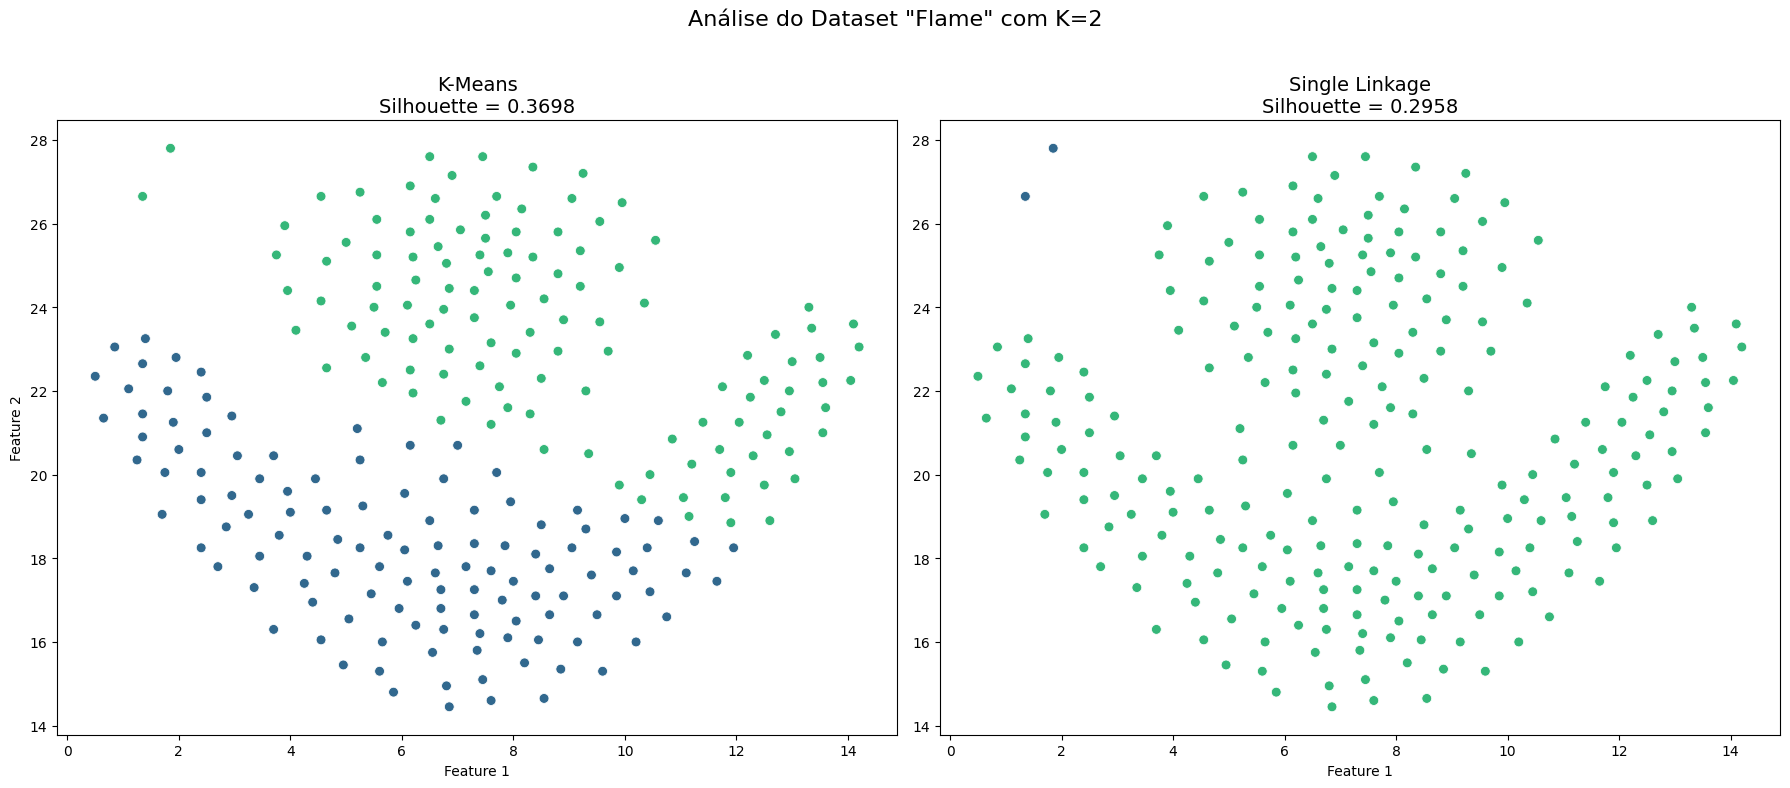

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle(f'Análise do Dataset "{Nome}" com K={K}', fontsize=16)

# Gráfico: K-Means

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Kmeans_Labels, palette='viridis', legend=None, ax=axes[0], s=50)
axes[0].set_title(f'K-Means\nSilhouette = {Kmeans_Silhouette:.4f}', fontsize=14)
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# Gráfico: Single Linkage
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=SingleLinkage_Labels, palette='viridis', legend=None, ax=axes[1], s=50)
axes[1].set_title(f'Single Linkage\nSilhouette = {SingleLinkage_Silhouette:.4f}', fontsize=14)
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Processando Dataset: Aggregation
K-Means Silhouette Score: 0.4718
Single Linkage Silhouette Score: 0.2703


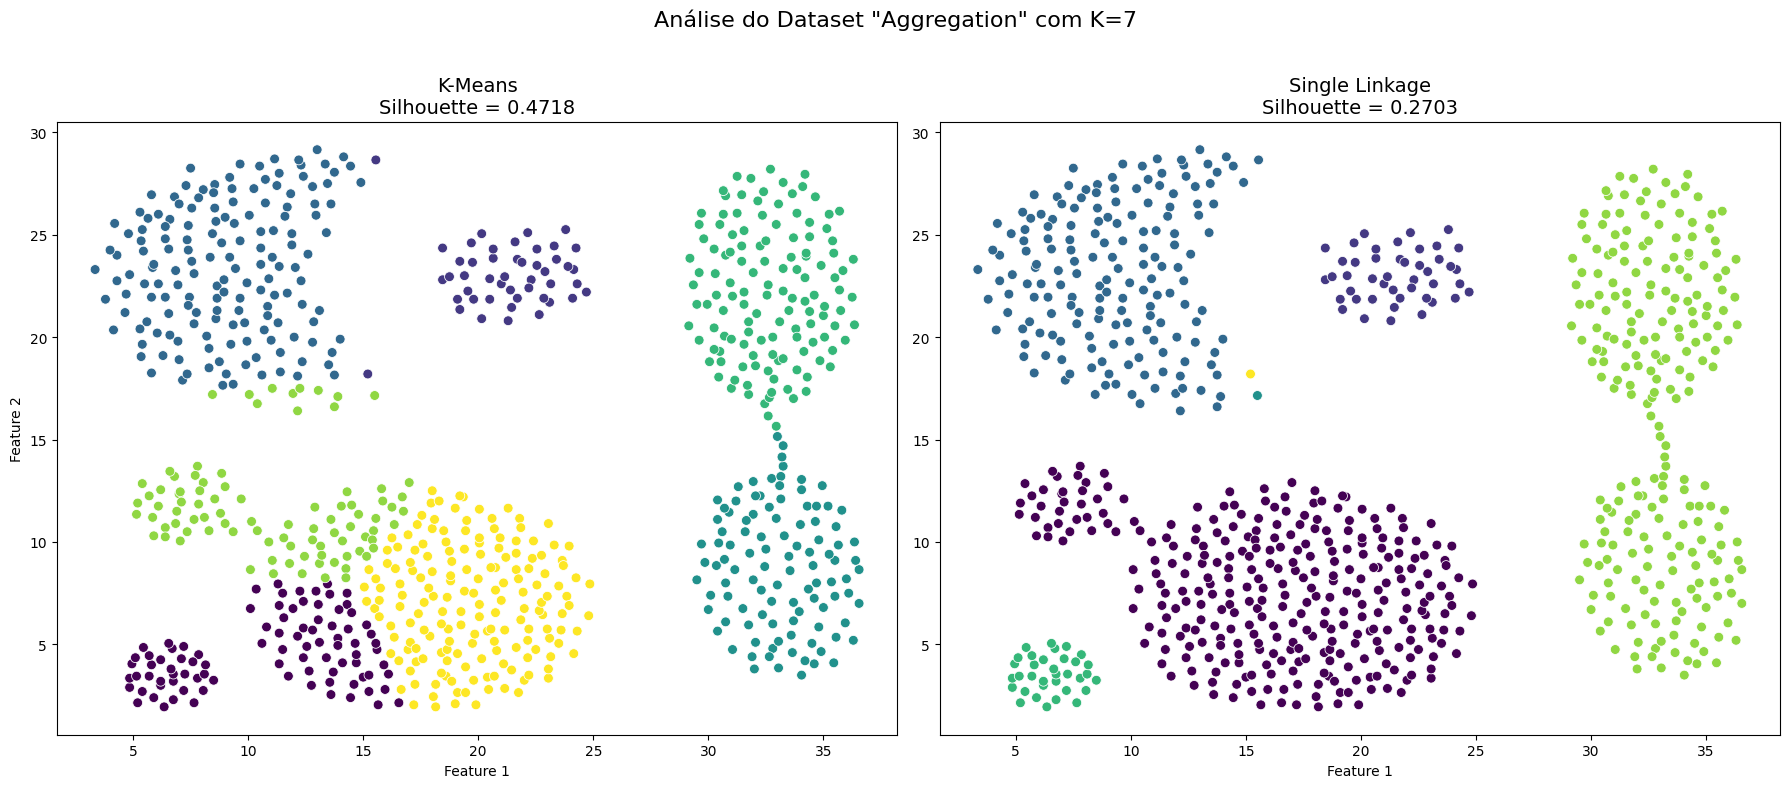

Processando Dataset: D31
K-Means Silhouette Score: 0.5546
Single Linkage Silhouette Score: -0.4473


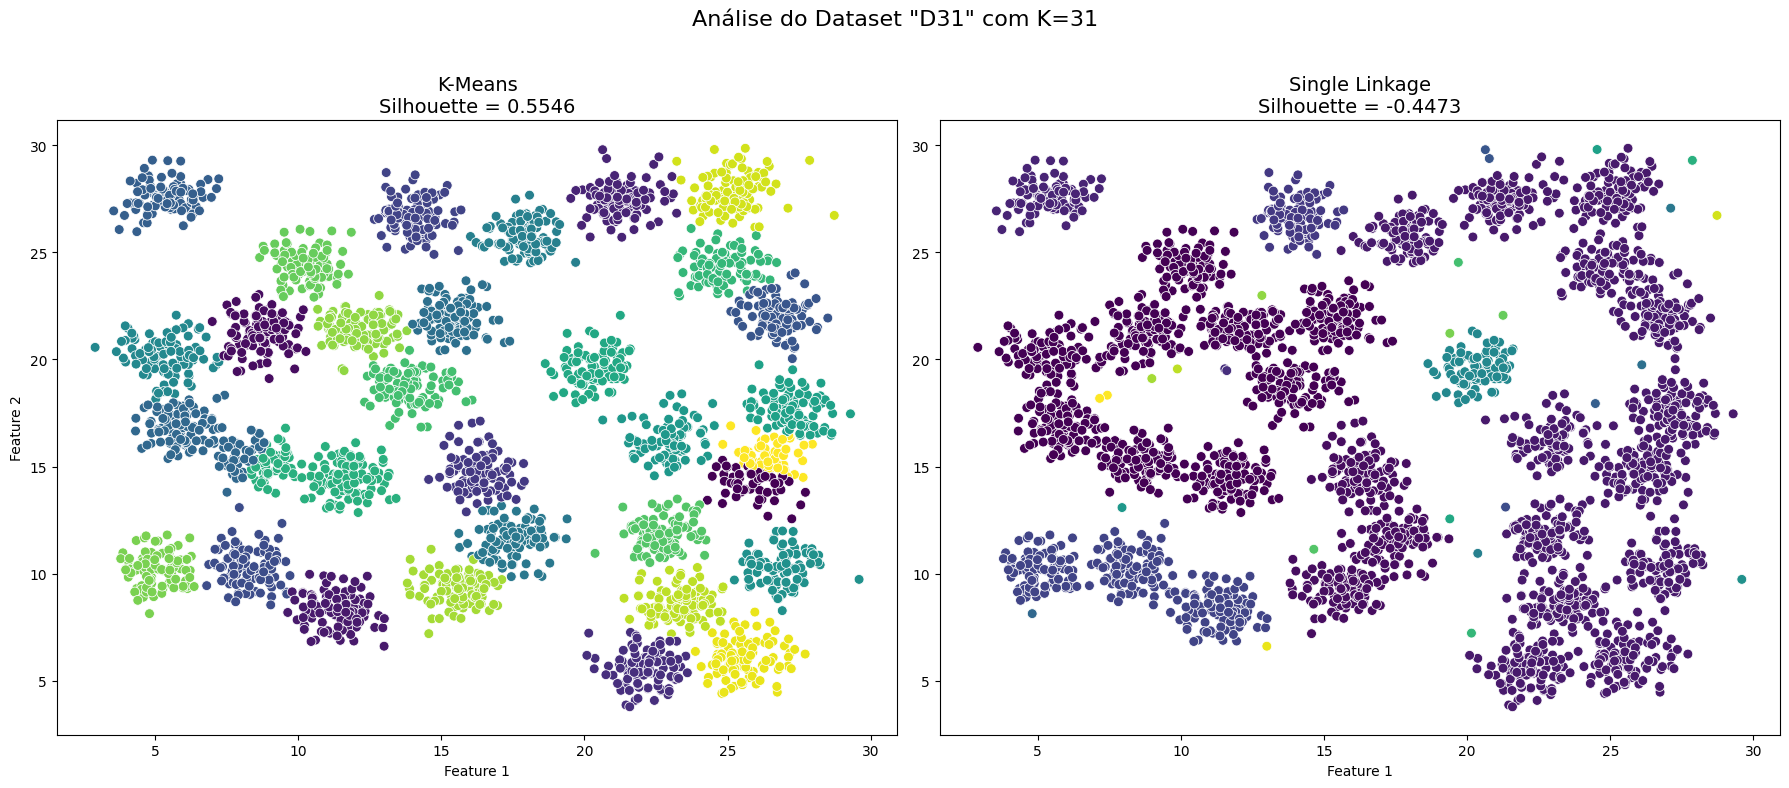

Processando Dataset: Pathbased
K-Means Silhouette Score: 0.5092
Single Linkage Silhouette Score: -0.1537


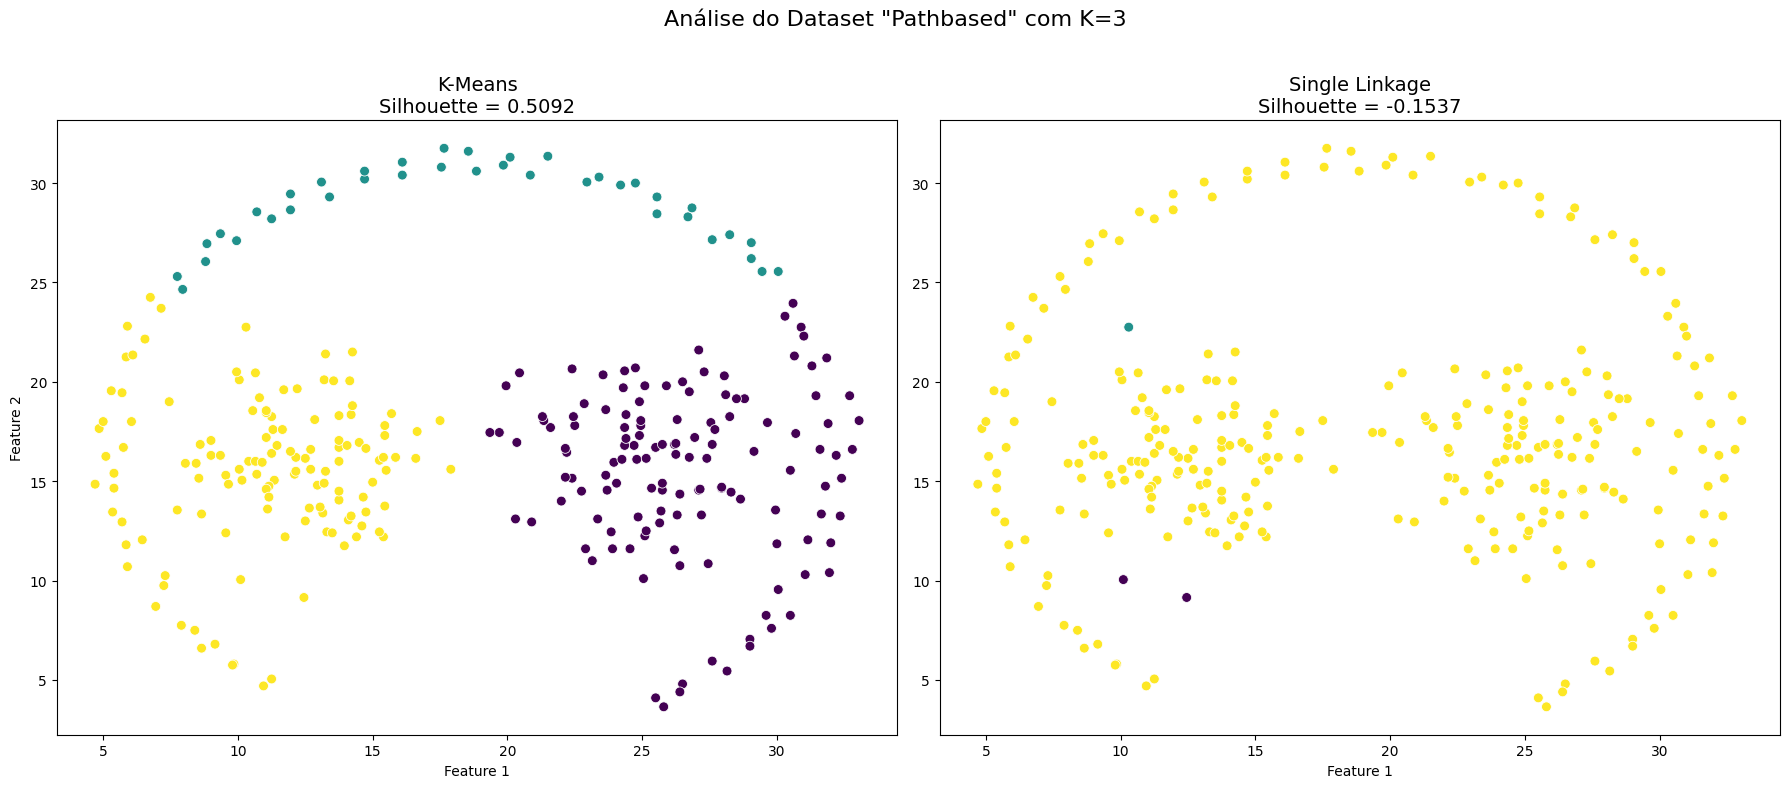

Processando Dataset: Flame
K-Means Silhouette Score: 0.3698
Single Linkage Silhouette Score: 0.2958


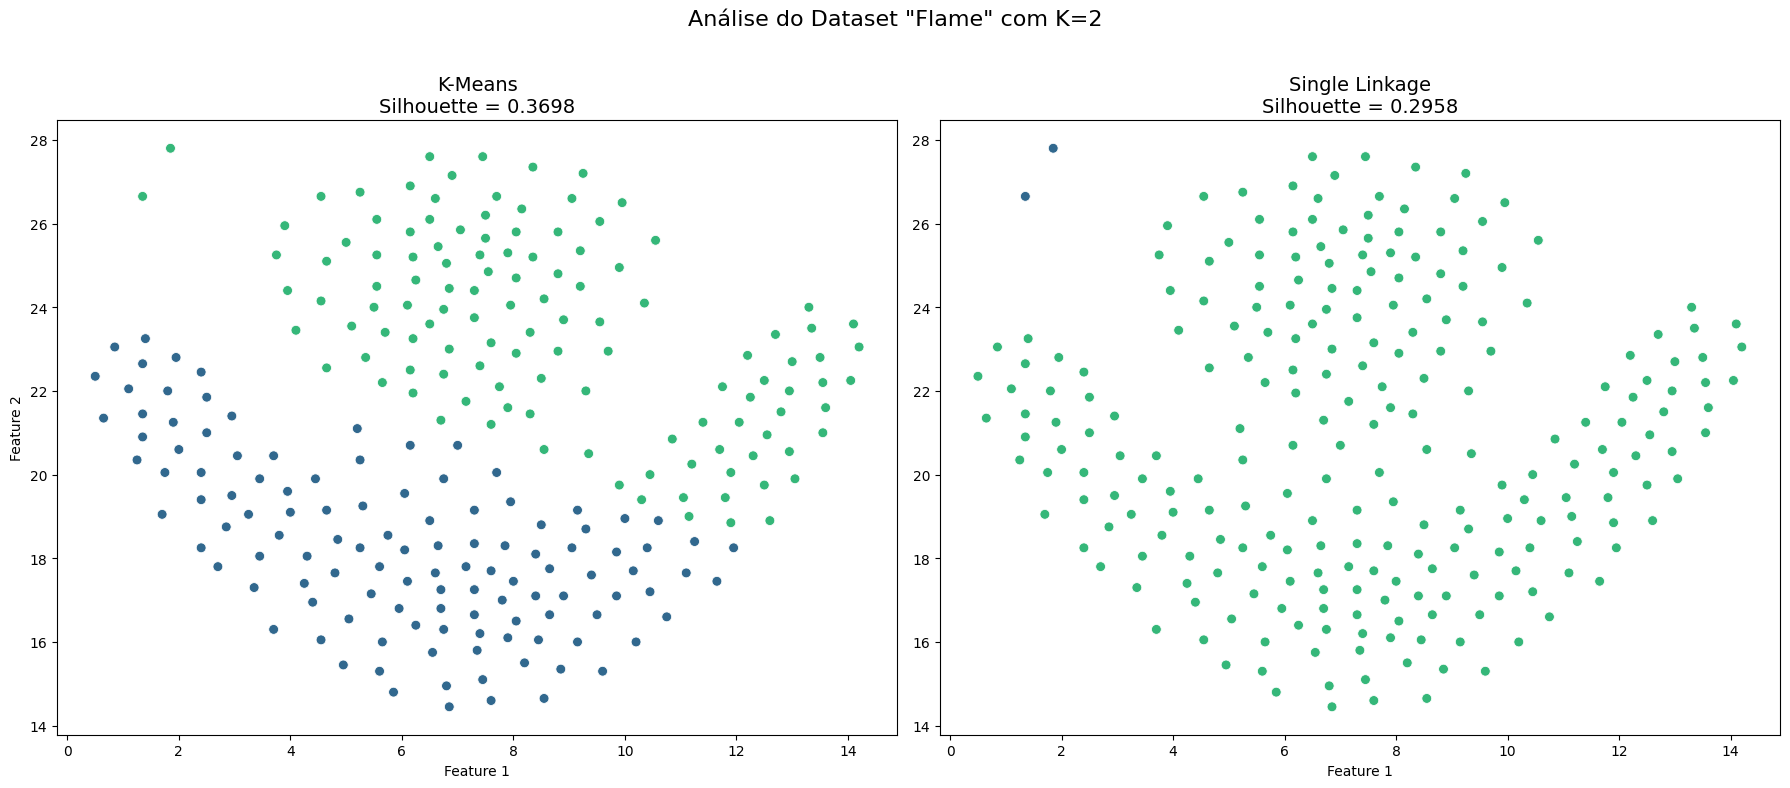

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Datasets = {
"Aggregation":"http://cs.joensuu.fi/sipu/datasets/Aggregation.txt",
"D31":"http://cs.joensuu.fi/sipu/datasets/D31.txt",
"Pathbased":"http://cs.joensuu.fi/sipu/datasets/pathbased.txt",
"Flame":"http://cs.joensuu.fi/sipu/datasets/flame.txt"
}

# Definindo número de Clusters (K) para cada Dataset
NClustersMap = {
  "Aggregation":7,
  "D31":31,
  "Pathbased":3,
  "Flame":2
}

for Nome, url in Datasets.items():
  print(f"Processando Dataset: {Nome}")
  K = NClustersMap[Nome]

  DF = pd.read_csv(url, sep='\s+', header=None)

  X = DF.iloc[:, [0, 1]].values
  Scaler = StandardScaler()
  X_Scaled = Scaler.fit_transform(X)

  Kmeans = KMeans(n_clusters = K, random_state=42, n_init="auto")
  Kmeans_Labels = Kmeans.fit_predict(X_Scaled)
  Kmeans_Silhouette = silhouette_score(X_Scaled, Kmeans_Labels)
  print(f"K-Means Silhouette Score: {Kmeans_Silhouette:.4f}")


  SingleLinkage = AgglomerativeClustering(n_clusters = K, linkage = "single")
  SingleLinkage_Labels = SingleLinkage.fit_predict(X_Scaled)
  SingleLinkage_Silhouette = silhouette_score(X_Scaled, SingleLinkage_Labels)
  print(f"Single Linkage Silhouette Score: {SingleLinkage_Silhouette:.4f}")

  fig, axes = plt.subplots(1, 2, figsize=(18, 8))
  fig.suptitle(f'Análise do Dataset "{Nome}" com K={K}', fontsize=16)

  # Gráfico: K-Means

  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Kmeans_Labels, palette='viridis', legend=None, ax=axes[0], s=50)
  axes[0].set_title(f'K-Means\nSilhouette = {Kmeans_Silhouette:.4f}', fontsize=14)
  axes[0].set_xlabel("Feature 1")
  axes[0].set_ylabel("Feature 2")

  # Gráfico: Single Linkage
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=SingleLinkage_Labels, palette='viridis', legend=None, ax=axes[1], s=50)
  axes[1].set_title(f'Single Linkage\nSilhouette = {SingleLinkage_Silhouette:.4f}', fontsize=14)
  axes[1].set_xlabel("Feature 1")
  axes[1].set_ylabel("")

  plt.tight_layout(rect=[0, 0, 1, 0.96])
  plt.show()